In [57]:
import pandas as pd

In [58]:
import numpy as np

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data=pd.read_csv('/content/Road Accident Data.csv')

In [61]:
data.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [62]:
data.shape

(307973, 23)

In [63]:
data.isna().any()

,0
Accident_Index,False
Accident Date,False
Month,False
Day_of_Week,False
Year,False
Junction_Control,False
Junction_Detail,False
Accident_Severity,False
Latitude,False
Light_Conditions,False


In [64]:
data.columns

Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [66]:
data.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


In [67]:
#drop unnecessary colums
drop_cols = ['Accident_Index', 'Accident Date', 'Time']
data = data.drop(columns=[c for c in drop_cols if c in data.columns], errors='ignore')

In [68]:
data.head()

,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,Urban,Fine no high winds,Car
1,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,Urban,Fine no high winds,Taxi/Private hire car
2,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Taxi/Private hire car
3,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,Urban,Other,Motorcycle over 500cc
4,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Car


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col].astype(str))

In [71]:
#handle missing values
data = data.fillna(data.mode().iloc[0])

In [72]:
#split features/target variables
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
#balance target classes
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [75]:
#train/test split
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
#train model
from sklearn.ensemble import RandomForestClassifier

In [80]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
y_pred

array([1, 0, 1, ..., 2, 2, 0])

In [82]:
from sklearn.metrics import accuracy_score,classification_report

In [83]:
accuracy_score(y_test, y_pred)

0.9010749012458219

In [84]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98     52729\n           1       0.86      0.87      0.86     52628\n           2       0.87      0.85      0.86     52611\n\n    accuracy                           0.90    157968\n   macro avg       0.90      0.90      0.90    157968\nweighted avg       0.90      0.90      0.90    157968\n'

In [85]:
from xgboost import XGBClassifier

In [86]:
model=XGBClassifier()

In [87]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [88]:
ypred=model.predict(X_test)

In [89]:
ypred

array([1, 0, 1, ..., 1, 1, 0])

In [90]:
from sklearn.metrics import accuracy_score,classification_report

In [91]:
accuracy_score(y_test, ypred)

0.7396814544717918

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
k=5

In [94]:
model=KNeighborsClassifier(n_neighbors=k)

In [95]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred=model.predict(X_test)

In [97]:
y_pred

array([1, 0, 1, ..., 2, 2, 0])

In [98]:
from sklearn.metrics import accuracy_score,classification_report

In [99]:
score=accuracy_score(y_test, y_pred)

In [100]:
score

0.8180137749417603

In [101]:
score=classification_report(y_test, y_pred)

In [102]:
score

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92     52729\n           1       0.75      0.80      0.77     52628\n           2       0.84      0.66      0.74     52611\n\n    accuracy                           0.82    157968\n   macro avg       0.82      0.82      0.81    157968\nweighted avg       0.82      0.82      0.81    157968\n'

In [103]:
# Create a DataFrame to store the accuracy scores
results = {'Model': ['Random Forest', 'XGBoost', 'KNeighbors'],
           'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, ypred), accuracy_score(y_test, y_pred)]} # Assuming y_pred is the prediction from KNeighbors and ypred from XGBoost
result_df = pd.DataFrame(results)


/tmp/ipython-input-1625533494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=result_df, palette='Blues_d')


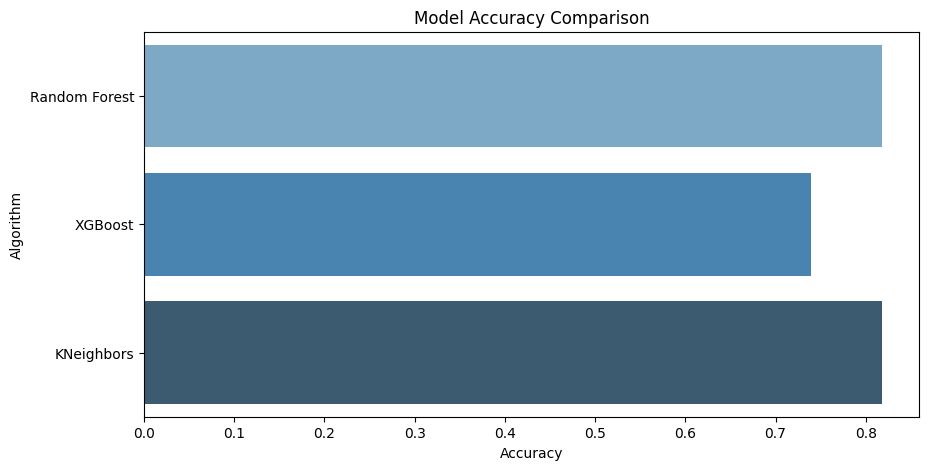

In [104]:
#plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=result_df, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()